# **AP155 Lab Assignment**
## Module 5: Partial Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.



### Student Information

_Full Name (Last Name, First Name)_: Ryan Anthony G. Maghuyop \
_Student No._: 2020-03987\
_Section_: THU-HX-3

### Submission Information

_Date and Time Submitted (most recent upload)_: Dec. 8, 2023

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Ryan Anthony G. Maghuyop

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/100

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**The Schrodinger equation and the Crank-Nicolson method**

_Refer to Exercise 9.8 in the Newman text._ In this problem, you will use the Crank-Nicolson method to solve the full time-dependent Schrodinger equation and hence develop a picture of how a wavefunction evolves over time.

Consider an electron (mass $M = 9.109 \times 10^{-31}$ kg) in a box of length $L = 10^{-8}$ m. Suppose that at time $t = 0$ the wavefunction of the electron has the form

$$ \psi(x,0) = \exp\left[-\frac{(x-x_0)^2}{2\sigma^2}\right]e^{i\kappa x},$$
where $x_0 = \frac{L}{2}$, $\sigma = 1 \times 10^{-10}$ m, $\kappa = 5 \times 10^{10} {\rm m}^{-1}$,  and $\psi = 0$ on the walls at $x = 0$ and $x = L$.

1. Perform a single step of the Crank-Nicolson method for this electron, calculating the vector $\psi(t)$ of values of the wavefunction, given the initial wavefunction above and using $N = 1000$ spatial slices with $a = L/N$. Your program will have to perform the following steps. First, given the vector $\psi(0)$ at $t = 0$, you will have to multiply by the matrix $\bf{B}$ to get a vector $\bf{v} = \bf{B}\psi$. Because of the tridiagonal form of $\bf{B}$, this is fairly simple. The $i$th component of $\bf{v}$ is given by
$$ v_i = b_1\psi_i + b_2(\psi_{i+1} + \psi_{i-1}).$$

   You will also have to choose a value for the time-step $h$. A reasonable choice is $h = 10^{-18}$ s. *(30 pts.)*

2. Second you will have to solve the linear system ${\bf Ax}= {\bf v}$ for $\bf{x}$, which gives you the new value of $\psi$. You could do this using a standard linear equation solver like the function $\tt solve$ in numpy's $\tt linalg$. *(20 pts.)*

3. Once you have the code in place to perform a single step of the calculation, extend your program to perform repeated steps and hence solve for $\psi$ at a sequence of times a separation $h$ apart. Note that the matrix $\bf A$ is independent of time, so it doesn't change from one step to another. You can set up the matrix just once and then keep on reusing it for every step. *(30 pts.)*

4. Make an animation of the solution by displaying the real part of the wavefunction at each time-step. You can use the function rate from the package visual to ensure a smooth frame-rate for your animation-- see Section 3.5 on page 117 of the Newman text.

   Run your animation for a while and describe what you see. Write a few sentences explaining in physics terms what is going on in the system. *(20 pts.)*

In [1]:
#Initializing packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from numpy import exp
from numpy.linalg import solve
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

The full time-dependent Schrödinger equation $\left(V(x) = 0\right)$ is

$$
-\frac{\hbar^2}{2M}\frac{\partial^2{\psi}}{\partial{x^2}} = i\hbar \frac{\partial{\psi}}{\partial{t}}
$$

where $\psi(x,t)$ is the wavefunction describing the state of the particle of interest. For this particular problem, we are interested in an electron inside a finite potential square well of width $L$. Because of this, we apply the hard-wall boundary condition on our wavefunction.

$$
\psi(0,t) = \psi(L,t) = 0, \forall \ t
$$

For each time $t$, we have grid points *a, 2a, 3a, ..., L-a* where $a$ is the spacing of our spacial grid points. Thus, we can arrange the values of $\psi$ at these interior points into a vector.

\begin{equation}
{\bf \psi}(t) =
\begin{pmatrix}
\psi(a,t) \\
\psi(2a,t) \\
\psi(3a,t) \\
\vdots
\end{pmatrix} \end{equation}

The Crank-Nicholson equation for the time-dependent Schrödinger equation is (derivation in Appendix A)

$$
\psi(x,t+h) - h\frac{i\hbar}{4M a^2}[\psi(x+a,t+h)+\psi(x-a,t+h)-2\psi(x,t+h)] = \psi(x,t) + h\frac{i\hbar}{4M a^2}[\psi(x+a,t)+\psi(x-a,t)-2\psi(x,t)]
$$

which is a set of simultaneous equation for each grid point. Using the ${\bf \psi}(t)$ vector defined above, we can rewrite these equations into the following form

$$
{\bf A \psi}(t+h) = {\bf B \psi}(t),
$$

where ${\bf A}$ and ${\bf B}$ are both symmetric and tridiagonal.

\begin{equation}
{\bf A} =
\begin{pmatrix}
a_1 & a_2 \\
a_2 & a_1 & a_2 \\
 & a_2 & a_1 & a_2 \\
 & & a_2 & a_1 \\
 & & & & \ddots
\end{pmatrix}, \qquad {\bf B} =
\begin{pmatrix}
b_1 & b_2 \\
b_2 & b_1 & b_2 \\
 & b_2 & b_1 & b_2 \\
 & & b_2 & b_1 \\
 & & & & \ddots
\end{pmatrix}\end{equation}

where

$$
a_1 = 1 + h\frac{i \hbar}{2Ma^2}, \quad a_2 = -h\frac{i \hbar}{4Ma^2}, \quad b_1 = 1 - h\frac{i \hbar}{2Ma^2}, \quad b_2 = h\frac{i \hbar}{4Ma^2}, \quad
$$

NOTES
- All animations are uploaded along with this *.ipynb* file to accompany the discussion.

PRELIMINARIES:

Here we are simply defining the physical constants and parameters and the elements of the tridiagonal matrices defined above. We are also defining a function to compute $\psi(x,0)$ which takes a position input $x$ and outputs its initial wavefunction at that position based on the given stationary state. These values are then collected in the list *psi_0*.

In [2]:
#Constants
M = 9.109e-31
L = 1e-8
h = 1e-18
N = 1000
hbar = 1.0546e-34
a = L/N

#Elements of tridiagonal matrices A and B
a1 = 1 + (h*1j*hbar)/(2*M*a**2)
a2 = -(h*1j*hbar)/(4*M*a**2)
b1 =  1 - (h*1j*hbar)/(2*M*a**2)
b2 = (h*1j*hbar)/(4*M*a**2)

def initial(x): #Given initial state
  x0 = L/2
  sigma = 1e-10
  k = 5e10
  fxn = exp(-(x-x0)**2/(2*sigma**2))*exp(1j*k*x)
  return fxn

x = np.arange(a,L+a,a)
psi_0 = np.empty(N, complex)
psi_0[:] = initial(x)

1. We obtain the vector $v$ element wise as defined from the question. This list is then converted into an array for $\tt np.linalg.solve$ later.

In [3]:
v_0 = [] #B*psi_0
for i in range(N):
  if i == 0:
    v_0.append(b1*psi_0[0] + b2*psi_0[1])
  elif i == N-1:
    v_0.append(b1*psi_0[N-1] + b2*psi_0[N-2])
  else:
    v_0.append(b1*psi_0[i] + b2*(psi_0[i+1] + psi_0[i-1]))

v_0 = np.array(v_0)

2. We create the tridiagonal matrix A by adding three diagonal matrices with $a_1$ and $a_2$ as elements. We then obtain the next wavefunction *psi_1* using $\tt solve$.

In [4]:
aa1 = np.full(N, a1)
aa2 = np.full(N - 1, a2)

A = np.diag(aa1, 0) + np.diag(aa2, 1) + np.diag(aa2, -1)
psi_1 = solve(A, v_0)

2.5. While $\tt solve$ works just fine, there are better algorithms for solving tridiagonal matrices specifically. Since we will be solving for a new set of $\psi(x,t)$ for every time step $h$, this inefficiency will add up and cause a significant amount of running time for our code. This defined function follows the logic from Chapter 6.1.6 (*p.233*) of Newman. For comparison, solving for 200 time steps of $\psi$ using $\tt solve$ takes around 30 seconds, while using this function takes 1-2 seconds.

In [5]:
def banded(aa, ba, ca, da):
    #Copy the inputs and determine the size of the system
    N = len(da)
    up, dia, down, v = map(np.array, (aa, ba, ca, da))
    for i in range(1, N):
        k = up[i-1]/dia[i-1] #Value of (i-1)^th upper diagonal after normalizing the (i-1)^th diagonal
        dia[i] -= k*down[i-1] #Normalzing the i^th diagonal
        v[i] -= k*v[i-1] #Applying the same on v

    x = np.empty(N,complex)
    x[-1] = v[-1]/dia[-1] #Starting with the last element, x_n = v_n/norm of diagonal
    #Backsubstitution
    for i in range(N-2, -1, -1):
        x[i] = (v[i]-down[i]*x[i+1])/dia[i]
    return x

3. This code iterates solving for $\psi$ for $N=$ *frames* times, which essentially determines the total amount of frames of our animation later. We store the $\psi$ values in the *psi* array, which is what we will animate.

In [6]:
frames = 5000
start = 0
psi = np.array([psi_0]) #Collection of psi_n

while start < frames:
  v = [] #B*psi_n
  p = psi[-1] #psi value from last time t
  for i in range(N):
    if i == 0:
      v.append(b1*p[0] + b2*p[1])
    elif i == N-1:
      v.append(b1*p[N-1] + b2*p[N-2])
    else:
      v.append(b1*p[i] + b2*(p[i+1] + p[i-1]))
  v = np.array(v)
  p_next = np.array(banded(aa2,aa1,aa2,v))
  psi = np.append(psi, [p_next], axis = 0)
  start += 1

4. By inspection, the form of the given stationary state is a Gaussian function multiplied by a plane wave. This is known to be a Gaussian wavepacket. Since the given wavevector $\kappa$ is positive, we expect that the packet will propagate towards the right. We should also expect that the packet will initially be centered at $x_0 = \frac{L}{2}$ with a standard deviation of $\sigma$. Since the order of magnitude of $\sigma$ is at $10^{-10}$, we expect that the initial wavepacket is highly localized.

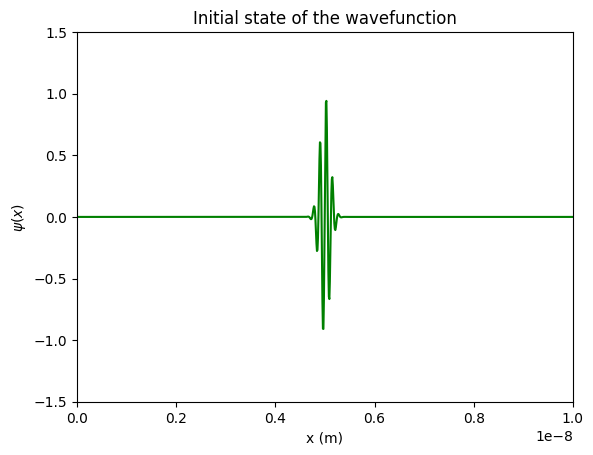

In [7]:
plt.plot(x, np.real(psi[0]), color = 'g')
plt.xlabel('x (m)')
plt.ylabel(r'$\psi(x)$')
plt.xlim([0, L])
plt.ylim([-1.5, 1.5])
plt.title('Initial state of the wavefunction')
plt.show()

In [8]:
psi1 = psi[0:300]
frames1 = 300

fig, ax = plt.subplots()
line, = ax.plot([],[], lw = 2)
ax.set_xlim([0, L])
ax.set_ylim([-1.5, 1.5])
ax.set_xlabel('x (m)')
ax.set_ylabel(r'$\mathcal{Re} (\psi)$')
ax.set_title('Initial propagation of the wavefunction')

def animate(i):
    y = np.real(psi1[i]) #Real part of psi
    line.set_data(x,y)
    line.set_color('green')
    return line,
ani = FuncAnimation(fig, animate, frames=frames1, interval=10, blit = True)


plt.close()

HTML(ani.to_html5_video())

As expected, the initial wavefunction is highly localized near $x_0$ and is propagating towards the right wall. Despite the high degree of localization, we can see from the code below that the maximum value of the wavefunction never exceeds $1$ which is an innate quantum mechanical property as described by the uncertainty principle.

In [9]:
max(np.abs(np.real(psi[0])))

0.9417948698691482

The wavepacket propagates with a group velocity $v_g$ given by

$$
v_g = \frac{p}{M} = \frac{\hbar \kappa}{M} \approx 5.8 \times 10^6 [\text{m/s}]
$$

Over time, the wavepacket decreases in peak and spreads more. The heuristic explanation is that the wavepacket contains waves of different momenta, and thus different velocities. The more involved mathematical explanation is that the Schrödinger equation for a free particle is related to the diffusion equation.

$$
-\frac{\hbar^2}{2M}\frac{\partial^2{\psi}}{\partial{x^2}} = i\hbar \frac{\partial{\psi}}{\partial{t}} \longleftrightarrow \frac{\partial \rho}{\partial t} = D \nabla^2\rho
$$

By this relation, it can be shown that the free particle solution with an initial Gaussian wavepacket diffuses over time.

The wavefunction can be seen reflecting off of the wall of our finite square well in the animation below. Despite its wave representation, we can still have an analogue classical interpretation for our wavefunction. By focusing on the wavepacket, we can interpret it as having an elastic collision with the wall and changing the direction of the "group momentum" of the wavepacket. The dispersion of the wavefunction persists during the entire time of the reflection, with a noticeable difference in spread before and after the collision.


In [10]:
psi2 = psi[600:1500]
frames2 = 900

fig, ax = plt.subplots()
line, = ax.plot([],[], lw = 2)
ax.set_xlim([0, L])
ax.set_ylim([-1.5, 1.5])
ax.set_xlabel('x (m)')
ax.set_ylabel(r'$\mathcal{Re} (\psi)$')
ax.set_title('Reflection of the wavefunction at a hard wall')

def animate(i):
    y = np.real(psi2[i])
    line.set_data(x,y)
    line.set_color('green')
    return line,
ani = FuncAnimation(fig, animate, frames=frames2, interval=10, blit = True)


plt.close()

HTML(ani.to_html5_video())

We can also visualize the system by plotting the probability density function $|\psi(x)|^2$ instead. As we can see the probability of finding the electron at $x = x_0$ initially is almost $1$, but after only $t = 3600h = 3.6 \times 10^{-15} \text{[sec]}$, the probability of finding the electron is almost uniform at any spatial point, with some small remaining peaks due to the group velocity of the original wavepacket.

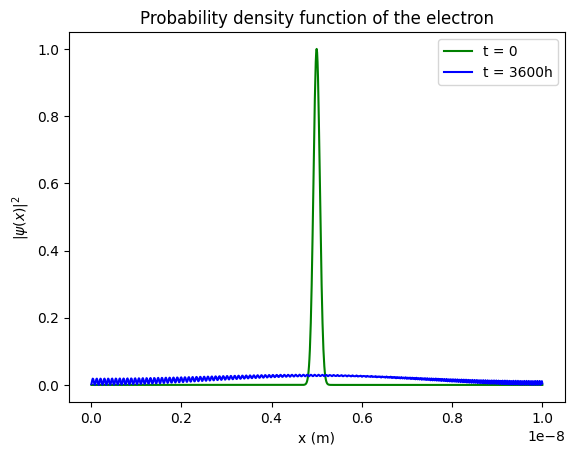

In [11]:
plt.plot(x, np.abs(psi[0])**2, color = 'g', label = 't = 0') #|psi|^2
plt.plot(x, np.abs(psi[3600])**2, color = 'b', label = 't = 3600h')
plt.xlabel('x (m)')
plt.ylabel(r'$|\psi(x)|^2$')
plt.title('Probability density function of the electron')
plt.legend()
plt.show()

#References
1. Newman, Mark. *Computational Physics with Python*.
2. Schwartz, Matthew. *Lecture 11: Wavepackets and dispersion*. Retrieved from https://scholar.harvard.edu/files/schwartz/files/lecture11-wavepackets.pdf.
3. Branson, Jim. *Time Development of a Gaussian Wave Packet*. Retrieved from https://quantummechanics.ucsd.edu/ph130a/130_notes/node83.html
4. *Gaussian wave packets*. Retrived from https://www.cond-mat.de/teaching/QM/JSim/wpack.html
5. *Free Particle - Wave Packets*. Stony Brook University. Retrieved from https://phys.libretexts.org/@go/page/57550
6. *Wave packet*. Wikipedia. Retrieved from https://en.wikipedia.org/wiki/Wave_packet

#Appendix

##A. Derivation of Crank-Nicolson equation

Applying the method of finite differences in the second-order derivative, we obtain the approximation

$$
\frac{\partial^2{\psi}}{\partial{x^2}} = \frac{\psi(x+a,t)+\psi(x-a,t)-2\psi(x,t)}{a^2}
$$

Thus, our TDSE can be approximated as

$$
\frac{\mathrm{d}\psi}{\mathrm{d}t} = \frac{i\hbar}{2M a^2}[\psi(x+a,t)+\psi(x-a,t)-2\psi(x,t)]
$$

We can then apply Euler's method on this ODE by letting $\dfrac{\mathrm{d}\psi}{\mathrm{d}t} = f(\psi,t)$. Applying Taylor's expansion on this and ignoring the second-order terms,

$$
\psi(t+h) = \psi(t) + h\frac{\mathrm{d}\psi}{\mathrm{d}t} = \psi(t) + hf(\psi,t)
$$

where $h$ is the time-step. Plugging this on our TDSE, we obtain

$$
\psi(x,t+h) = \psi(x,t) + h\frac{i\hbar}{2M a^2}[\psi(x+a,t)+\psi(x-a,t)-2\psi(x,t)]
$$

Applying the subsitutions $h \to -h$ and $t \to t+h$ in succession, we obtain the implicit equation

$$
\psi(x,t+h) - h\frac{i\hbar}{2M a^2}[\psi(x+a,t+h)+\psi(x-a,t+h)-2\psi(x,t+h)] = \psi(x,t)
$$

Taking the average of these two equations, we arrive at the Crank-Nicholson equation for the TDSE

$$
\psi(x,t+h) - h\frac{i\hbar}{4M a^2}[\psi(x+a,t+h)+\psi(x-a,t+h)-2\psi(x,t+h)] = \psi(x,t) + h\frac{i\hbar}{4M a^2}[\psi(x+a,t)+\psi(x-a,t)-2\psi(x,t)]
$$

##B. Full animation of wavefunction and probability density function

In [12]:
fig, ax = plt.subplots()
line, = ax.plot([],[], lw = 2)
ax.set_xlim([0, L])
ax.set_ylim([-1.5, 1.5])
ax.set_xlabel('x (m)')
ax.set_ylabel(r'$\mathcal{Re} (\psi)$')
ax.set_title('Wavefunction evolution of the electron')

def animate(i):
    y = np.real(psi[i])
    line.set_data(x,y)
    line.set_color('green')
    return line,
ani = FuncAnimation(fig, animate, frames=frames, interval=10, blit = True)


plt.close()

HTML(ani.to_html5_video())

In [13]:
fig, ax = plt.subplots()
line, = ax.plot([],[], lw = 2)
ax.set_xlim([0, L])
ax.set_ylim([0, 1.5])
ax.set_xlabel('x (m)')
ax.set_ylabel(r'$|\psi(x)|^2$')
ax.set_title('Probability density function of the electron')


def animate(i):
    y = np.abs(psi[i])**2
    line.set_data(x,y)
    line.set_color('green')
    return line,
ani = FuncAnimation(fig, animate, frames=frames, interval=10, blit = True)


plt.close()

HTML(ani.to_html5_video())